In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import datetime as dt
from matplotlib import style

style.use('ggplot')

# downloading and saving bitcoin stock price data as a csv file
## start = dt.datetime(2014, 1, 1)
### end = dt.datetime(2020, 8, 1)
## df = web.DataReader('BTC-CAD', 'yahoo', start, end)
# df.to_csv('Bitcoin.csv')

In [2]:
df = pd.read_csv('Bitcoin.csv', parse_dates=True, index_col=0)
print(df.head())

                  High         Low        Open       Close    Volume  \
Date                                                                   
2014-09-16  513.446411  497.302246  511.192596  503.479004  23181431   
2014-09-17  502.728729  452.183655  502.957153  464.379822  37728069   
2014-09-18  468.607666  419.985870  464.011078  432.735870  41563783   
2014-09-19  463.974731  427.350739  432.601074  448.199677  40406191   
2014-09-20  452.060120  430.965698  447.301971  436.509613  29091919   

             Adj Close  
Date                    
2014-09-16  503.479004  
2014-09-17  464.379822  
2014-09-18  432.735870  
2014-09-19  448.199677  
2014-09-20  436.509613  


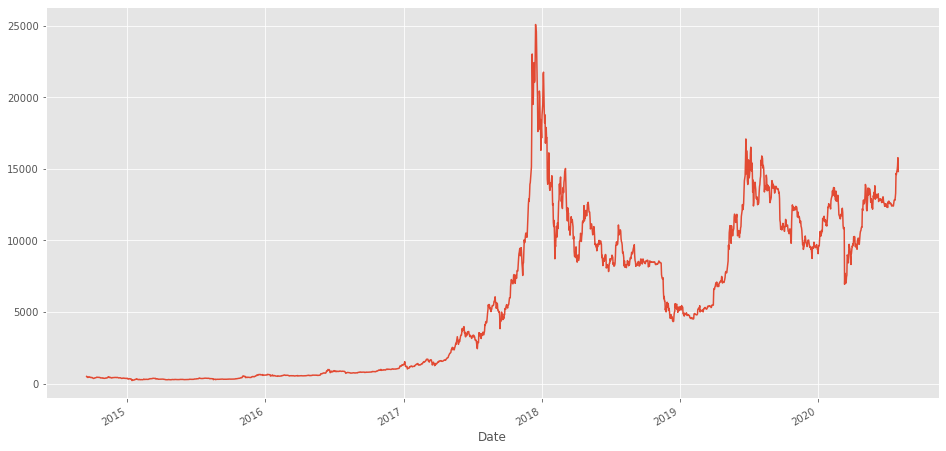

In [3]:
plt.rcParams['figure.figsize'] = [16, 8]
df['Adj Close'].plot()
plt.show()

In [4]:
# resampling data: find weekly OHLC (Open, High, Low, Close)
df_weekly = df.resample('7D').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
df_weekly.reset_index(inplace=True)
df_volume = df[['Volume']].resample('7D').sum()
df_volume.reset_index(inplace=True)
# date -> matplotlib format of date
df_weekly['Date'] = df_weekly['Date'].map(mdates.date2num)
df_volume['Date'] = df_volume['Date'].map(mdates.date2num)
print(df_weekly.head())
print(df_volume.head())

       Date        Open        High         Low       Close     Volume
0  735492.0  511.192596  513.446411  419.985870  482.464203  248533093
1  735499.0  482.419952  483.037659  415.233704  433.532043  205858866
2  735506.0  434.073212  438.853271  325.197632  375.083862  378099000
3  735513.0  375.004608  461.472290  365.730743  453.584412  320746558
4  735520.0  453.680573  455.039398  419.591827  433.779541  128165778
       Date     Volume
0  735492.0  248533093
1  735499.0  205858866
2  735506.0  378099000
3  735513.0  320746558
4  735520.0  128165778


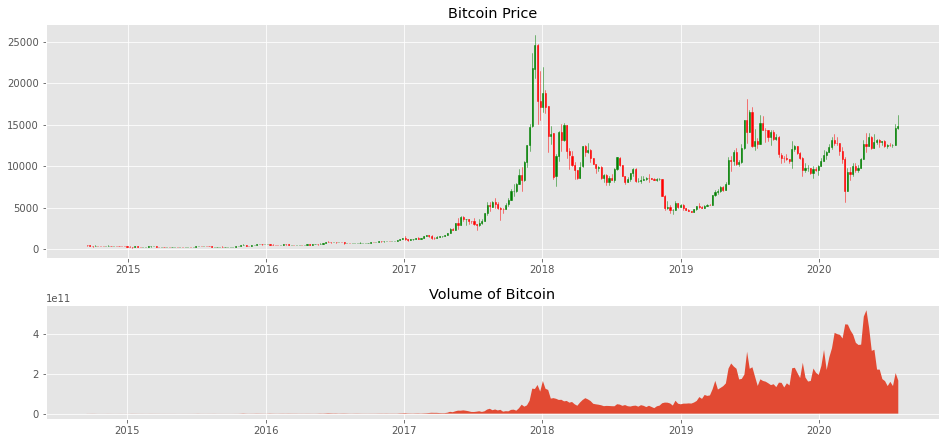

In [5]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan=6, colspan=1)
ax2 = plt.subplot2grid((11,1), (7,0), rowspan=3, colspan=1)
ax1.xaxis_date()
ax2.xaxis_date()
candlestick_ohlc(ax1, df_weekly.values, width=3, colorup='g')
ax1.set_title('Bitcoin Price')
ax2.fill_between(df_volume['Date'], df_volume['Volume'])
ax2.set_title('Volume of Bitcoin')
plt.show()